In [1]:
import requests
import os
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

In [2]:
COVID_DATA_FILE_LOC = './datasets/covid_data.csv'
ELECTION_RESULTS_FILE_LOC = './datasets/2020_election_results.csv'
CENSUS_POPS_FILE_LOC = './datasets/census_pops.csv'
VAX_DATA_FILE_LOC = './datasets/vax_data.csv'
HOSP_DATA_FILE_LOC = './datasets/hosp_data.csv'

def download_data(url, filename):
    # Streaming, so we can iterate over the response.
    response = requests.get(url, stream=True)
    total_size_in_bytes= int(response.headers.get('content-length', 0))
    block_size = 1024 #1 Kibibyte
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)
    with open(filename, 'wb') as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()

def download_files(replace=False):
    if not os.path.exists(ELECTION_RESULTS_FILE_LOC) or replace:
        print('Downloading webscraped county level presidential election results...')
        download_data('https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv',
                     ELECTION_RESULTS_FILE_LOC)
    if not os.path.exists(VAX_DATA_FILE_LOC) or replace:
        print('Downloading CDC county level vaccination data...')
        download_data('https://data.cdc.gov/api/views/8xkx-amqh/rows.csv',
                     VAX_DATA_FILE_LOC)
    if not os.path.exists(HOSP_DATA_FILE_LOC) or replace:
        print('Downloading HHS Hospitalization data...')
        download_data('https://healthdata.gov/resource/anag-cw7u.csv',
                     HOSP_DATA_FILE_LOC)
    print('Finished downloading.')

download_files(replace=False)

Finished downloading.


In [3]:
vax_df = pd.read_csv('./datasets/vax_data.csv', low_memory=False)
vax_df['Date'] = pd.to_datetime(vax_df['Date'], format='%m/%d/%Y')
vax_df.drop(vax_df.loc[vax_df.FIPS=='UNK'].index, inplace=True)
vax_df['FIPS'] = vax_df['FIPS'].astype(float)
vax_df.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,Series_Complete_5PlusPop_Pct_SVI,Series_Complete_5PlusPop_Pct_UR_Equity,Booster_Doses,Booster_Doses_18Plus,Booster_Doses_50Plus,Booster_Doses_65Plus,Booster_Doses_Vax_Pct,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_50Plus_Vax_Pct,Booster_Doses_65Plus_Vax_Pct
0,2022-01-15,6051.0,2,Mono County,CA,0.0,0,0.0,0.0,0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-15,1083.0,2,Limestone County,AL,35.2,34772,34527.0,40.7,33046,...,10.0,2.0,9910.0,9861.0,8089.0,5317.0,28.5,29.8,39.8,52.2
2,2022-01-15,13119.0,2,Franklin County,GA,17.3,4040,4014.0,20.1,3808,...,13.0,5.0,2425.0,2417.0,1944.0,1322.0,60.0,63.5,92.7,95.0
3,2022-01-15,13095.0,2,Dougherty County,GA,29.0,25489,25160.0,34.0,22778,...,14.0,2.0,13043.0,12947.0,10063.0,6205.0,51.2,56.8,91.3,95.0
4,2022-01-15,27051.0,2,Grant County,MN,53.1,3173,3117.0,61.4,2951,...,4.0,8.0,1594.0,1586.0,1267.0,860.0,50.2,53.7,62.5,71.0


In [4]:
hosp_df = pd.read_csv('./datasets/hosp_data.csv')
hosp_df['collection_week'] = pd.to_datetime(hosp_df['collection_week'], format='%Y/%m/%d')
hosp_df.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day,is_corrected
0,320084,2022-01-07,NM,320084,ROOSEVELT GENERAL HOSPITAL,42121 US HIGHWAY 70,PORTALES,88130.0,Short Term,35041.0,...,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,False
1,360362,2021-12-31,OH,360362,TRIHEALTH EVENDALE HOSPITAL,3155 GLENDALE MILFORD ROAD,CINCINNATI,45241.0,Short Term,39061.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
2,412001,2021-12-31,RI,412001,ELEANOR SLATER HOSPITAL,111 HOWARD AVE,CRANSTON,2921.0,Long Term,44007.0,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,False
3,440218,2021-12-31,TN,440218,SAINT THOMAS HOSPITAL FOR SPECIALTY SURGERY,2011 MURPHY AVENUE,NASHVILLE,37203.0,Short Term,47037.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
4,450888,2021-12-31,TX,450888,TEXAS HEALTH HARRIS METHODIST HOSPITAL SOUTHLAKE,1545 E SOUTHLAKE BLVD,SOUTHLAKE,76092.0,Short Term,48439.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False


In [5]:
hosp_df.describe()

,zip,fips_code,total_beds_7_day_avg,all_adult_hospital_beds_7_day_avg,all_adult_hospital_inpatient_beds_7_day_avg,inpatient_beds_used_7_day_avg,all_adult_hospital_inpatient_bed_occupied_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_covid_7_day_avg,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,...,previous_day_admission_adult_covid_confirmed_7_day_coverage,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day
count,379814.000000,379361.000000,378467.000000,373530.000000,374239.000000,378945.000000,376501.000000,377450.000000,377094.000000,377302.000000,...,379815.000000,379815.000000,379815.000000,379815.000000,159504.000000,158871.000000,159183.000000,159510.000000,159565.000000,159577.000000
mean,53952.544003,29423.278302,-780.414288,-1697.923405,-5298.956673,-79605.810605,-81687.762402,-301283.341479,-299020.750625,-115580.855896,...,6.880645,6.790295,6.879228,6.794371,-87324.659501,-6470.387176,-66825.047511,-4917.544135,-47150.777276,-39837.582001
std,26840.812257,16197.880682,30747.290930,42946.780354,73477.803258,270871.045449,274060.510617,458828.769718,457840.682300,319722.157537,...,0.693040,1.041873,0.700756,1.030200,282454.914171,82558.113592,250665.983262,75414.928941,212361.613717,196000.689043
min,603.000000,1001.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,...,0.000000,0.000000,0.000000,0.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000
25%,33016.000000,17043.000000,28.000000,25.000000,23.000000,10.300000,9.300000,-999999.000000,-999999.000000,0.000000,...,7.000000,7.000000,7.000000,7.000000,0.000000,9.000000,0.000000,30.000000,0.000000,0.000000
50%,55337.000000,29009.000000,70.000000,64.000000,54.000000,34.800000,31.700000,0.000000,0.000000,0.000000,...,7.000000,7.000000,7.000000,7.000000,0.000000,85.000000,23.000000,160.000000,0.000000,0.000000
75%,76063.000000,42091.000000,219.000000,198.000000,167.000000,132.600000,124.900000,13.400000,11.600000,0.000000,...,7.000000,7.000000,7.000000,7.000000,9.000000,298.000000,211.000000,640.000000,5.000000,4.000000
max,99901.000000,78020.000000,5015.400000,4780.000000,2875.400000,2565.100000,2313.000000,1297.100000,1295.900000,121.900000,...,7.000000,7.000000,7.000000,7.000000,539270.000000,520037.000000,520037.000000,520037.000000,520037.000000,520037.000000


In [6]:
hosp_df = hosp_df.replace(-999999, np.nan)
hosp_df = hosp_df.loc[(hosp_df.icu_beds_used_7_day_coverage>0) & (hosp_df.total_icu_beds_7_day_coverage>0)
                     & (hosp_df.icu_beds_used_7_day_avg>=0) & (hosp_df.total_icu_beds_7_day_avg>0)]

In [7]:
hosp_df.loc[:,['icu_beds_used_7_day_avg', 'total_icu_beds_7_day_avg']].describe()

,icu_beds_used_7_day_avg,total_icu_beds_7_day_avg
count,198719.000000,198719.000000
mean,29.063517,40.199538
std,38.054563,48.370572
min,0.000000,4.000000
25%,7.700000,11.400000
50%,15.100000,22.700000
75%,34.100000,48.000000
max,537.400000,849.900000


In [8]:
hosp_df['icu_capacity_filled'] = hosp_df['icu_beds_used_7_day_avg'] / hosp_df['total_icu_beds_7_day_avg']
hosp_df['icu_capacity_filled'].describe()

count    198719.000000
mean          0.720272
std           0.232956
min           0.000000
25%           0.584783
50%           0.760000
75%           0.900000
max           6.588889
Name: icu_capacity_filled, dtype: float64

In [9]:
merged_df = pd.merge(hosp_df, vax_df, left_on=['collection_week','fips_code'], right_on=['Date','FIPS'], how='left')
merged_df.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,Series_Complete_5PlusPop_Pct_SVI,Series_Complete_5PlusPop_Pct_UR_Equity,Booster_Doses,Booster_Doses_18Plus,Booster_Doses_50Plus,Booster_Doses_65Plus,Booster_Doses_Vax_Pct,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_50Plus_Vax_Pct,Booster_Doses_65Plus_Vax_Pct
0,100054,2021-12-10,FL,100054,TWIN CITIES HOSPITAL,2190 HWY 85 N,NICEVILLE,32578.0,Short Term,12091.0,...,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,040161,2021-10-15,AR,040161,ARKANSAS HEART HOSPITAL-ENCORE,1901 ENCORE WAY,BRYANT,72022.0,Short Term,5125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,392036,2021-10-15,PA,392036,SELECT SPECIALTY HOSPITAL LAUREL HIGHLANDS INC,ONE MELLON WAY,LATROBE,15650.0,Long Term,42129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,040161,2021-10-01,AR,040161,ARKANSAS HEART HOSPITAL-ENCORE,1901 ENCORE WAY,BRYANT,72022.0,Short Term,5125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,040161,2021-09-17,AR,040161,ARKANSAS HEART HOSPITAL-ENCORE,1901 ENCORE WAY,BRYANT,72022.0,Short Term,5125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
elec_df = pd.read_csv('./datasets/2020_election_results.csv')
elec_df.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


In [11]:
vax_elec_df = pd.merge(vax_df, elec_df, left_on='FIPS', right_on='county_fips')
vax_elec_df.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,2022-01-15,6051.0,2,Mono County,CA,0.0,0,0.0,0.0,0,...,California,6051,Mono County,2513,4013,6737,-1500,0.373015,0.595666,-0.222651
1,2022-01-14,6051.0,2,Mono County,CA,0.0,0,0.0,0.0,0,...,California,6051,Mono County,2513,4013,6737,-1500,0.373015,0.595666,-0.222651
2,2022-01-13,6051.0,2,Mono County,CA,0.0,0,0.0,0.0,0,...,California,6051,Mono County,2513,4013,6737,-1500,0.373015,0.595666,-0.222651
3,2022-01-12,6051.0,2,Mono County,CA,0.0,0,0.0,0.0,0,...,California,6051,Mono County,2513,4013,6737,-1500,0.373015,0.595666,-0.222651
4,2022-01-11,6051.0,2,Mono County,CA,0.0,0,0.0,0.0,0,...,California,6051,Mono County,2513,4013,6737,-1500,0.373015,0.595666,-0.222651


In [12]:
hosp_elec_df = pd.merge(hosp_df, elec_df, left_on='fips_code', right_on='county_fips')
hosp_elec_df.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,100054,2021-12-10,FL,100054,TWIN CITIES HOSPITAL,2190 HWY 85 N,NICEVILLE,32578.0,Short Term,12091.0,...,Florida,12091,Okaloosa County,79798,34248,116373,45550,0.685709,0.294295,0.391414
1,100223,2021-12-31,FL,100223,FORT WALTON BEACH MEDICAL CENTER,1000 MAR-WALT DR,FORT WALTON BEACH,32547.0,Short Term,12091.0,...,Florida,12091,Okaloosa County,79798,34248,116373,45550,0.685709,0.294295,0.391414
2,100122,2021-12-24,FL,100122,NORTH OKALOOSA MEDICAL CENTER,151 REDSTONE AVE SE,CRESTVIEW,32539.0,Short Term,12091.0,...,Florida,12091,Okaloosa County,79798,34248,116373,45550,0.685709,0.294295,0.391414
3,100223,2022-01-07,FL,100223,FORT WALTON BEACH MEDICAL CENTER,1000 MAR-WALT DR,FORT WALTON BEACH,32547.0,Short Term,12091.0,...,Florida,12091,Okaloosa County,79798,34248,116373,45550,0.685709,0.294295,0.391414
4,100223,2021-12-24,FL,100223,FORT WALTON BEACH MEDICAL CENTER,1000 MAR-WALT DR,FORT WALTON BEACH,32547.0,Short Term,12091.0,...,Florida,12091,Okaloosa County,79798,34248,116373,45550,0.685709,0.294295,0.391414


In [13]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

In [20]:
stats_titles = {'Series_Complete_Pop_Pct': 'Percent of Population Fully Vaccinated',
               'Administered_Dose1_Pop_Pct': 'Percent of Population With At Least One Dose',
               'Booster_Doses_Vax_Pct': 'Percent of Population With Booster Shot'}

In [62]:
events = {'9/22/2020': '  Death toll surpasses 200,000',
          '10/2/2020': '  President Trump tests positive for CoVID',
          '11/13/2020': '  Increased outbreaks due to Halloween gatherings',
          '11/3/2020': '  2020 Presidential Election',
        '12/11/2020': '  FDA issues Emergency Use of Pfizer Vaccine',
         '12/14/2020': '  Death toll surpasses 300,000',
         '1/18/2021': '  Death toll surpasses 400,000',
          '2/21/2021': '  Death toll surpasses 500,000',
         '2/27/2021': '  FDA issues Emergency Use of J&J Vaccine',
         '3/8/2021': '  CDC says fully vaxxed people can gather maskless',
         '4/13/2021': '  CDC pauses J&J vaccine due to blood clots',
         '4/23/2021': '  CDC ends pause on J&J vaccine',
         '6/1/2021': '  Delta becomes the dominant variant in the US',
         '7/27/2021': '  CDC urges masks indoors in high-transmission areas',
         '7/30/2021': '  A MMWR notes an increase in breakthrough infections',
         '8/6/2021': '  CDC study: Vaxxed half as likely to reinfect again',
         '10/21/2021': '  CDC recommends booster shots for people 65+',
         '10/29/2021': '  CDC study: Vaccines offer higher protection than previous infection',
         '11/2/2021': '  CDC recommends Pfizer vaccine to children 5+',
         '11/26/2021': '  WHO classifies Omicron variant',
         '11/29/2021': '  CDC recommends 18+ receive a booster shot'}
events_df = pd.DataFrame.from_dict(events, orient='index', columns=['Event text'])
events_df.index = pd.to_datetime(events_df.index, format='%m/%d/%Y')
events_df.head()

,Event text
2020-09-22,"Death toll surpasses 200,000"
2020-10-02,President Trump tests positive for CoVID
2020-11-13,Increased outbreaks due to Halloween gatherings
2020-11-03,2020 Presidential Election
2020-12-11,FDA issues Emergency Use of Pfizer Vaccine


In [73]:
def lerp(x0,x1,t):
    return (1-t)*x0 + t*x1

def get_ranges(num_stratifications):
    partisan_ranges = np.linspace(-1,1,num_stratifications+1)
    
    rep_ranges = partisan_ranges[:len(partisan_ranges)//2+1]
    dem_ranges = partisan_ranges[len(partisan_ranges)//2:]
    
    partisan_labels = []
    for i, (candidate, ranges) in enumerate(zip(['Biden','Trump'], [rep_ranges, dem_ranges])):
        if i == 0:
            ranges = ranges[1:]
        else:
            ranges = ranges[:-1]
        for partisan_val in ranges:
            if partisan_val == 0:
                partisan_labels.append(f'Battleground - Lean {candidate}')
            else:
                partisan_labels.append(f'{candidate}+{abs(partisan_val)*100:.0f}')
                
    colors = plt.get_cmap('bwr')(np.linspace(0,1,num_stratifications))
    return {(r_s,r_e): (label, c) for r_s, r_e, label, c in zip(partisan_ranges[:-1], partisan_ranges[1:], partisan_labels, colors)}

def get_fig(figsize=(8,6)):
    fig = plt.figure(figsize=figsize)
    ax = fig.subplots()
    return fig, ax

def draw_events(ax, height=40):
    ax.vlines(events_df.index, 0, height)
    for i, (date, event_text) in enumerate(events_df.iterrows()):
        ax.annotate(event_text[0], (date-pd.Timedelta(hours=6),0), fontsize='x-small', ha='right', rotation=90)

def draw_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    ranges = sorted(ranges_dict.keys(), key=lambda r: abs(r[0]))
    _, handles, labels = zip(*sorted(zip(ranges, handles, labels), key=lambda t: t[0][0], reverse=False))
    ax.legend(handles, labels, loc='upper left')
    
def draw_vax(ax, metric, time_window=None, **kwargs):
    df = vax_elec_df.copy()
        
    ranges = sorted(ranges_dict.keys(), key=lambda r: abs(r[0]))
    for _range in ranges:
        label, color = ranges_dict[_range]
        subset_df = df.loc[(df.per_point_diff>=_range[0]) & (df.per_point_diff<_range[1])]
        subset_df = subset_df.groupby('Date').mean()

        ax.plot(subset_df[metric], c=color, label=label)
    ax.set_ylabel(stats_titles[metric])
    if time_window is not None:
        ax.set_xlim(time_window[0], time_window[1])
    ax.set_ylim(bottom=0)

def draw_hosp(ax, time_window=None, **kwargs):
    df = hosp_elec_df.copy()
    
    if time_window is not None:
        df = df.loc[(df['collection_week']>=time_window[0]) * (df['collection_week']<time_window[1])]
    
    ranges = sorted(ranges_dict.keys(), key=lambda r: abs(r[0]))
    for _range in ranges:
        label, color = ranges_dict[_range]
        subset_df = df.loc[(df.per_point_diff>=_range[0]) & (df.per_point_diff<_range[1])]
        subset_df = subset_df.groupby('collection_week').mean()
        
        ax.plot(subset_df['icu_capacity_filled']*100 - 50, c=color, label=label)
    ax.set_xlabel('Date')
    ax.set_ylabel('Percent of ICU Capacity Filled')
    if time_window is not None:
        ax.set_xlim(time_window[0], time_window[1])
    ax.set_ylim(bottom=0)

In [79]:
num_groups = 6
ranges_dict = get_ranges(num_groups)

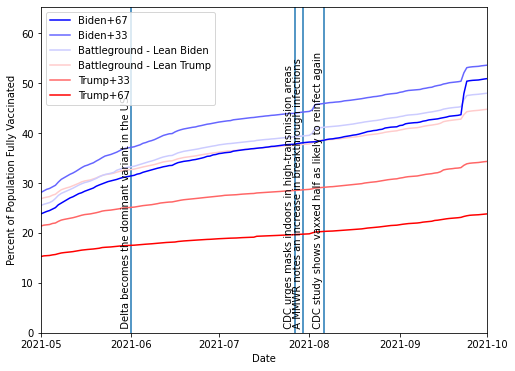

<Figure size 432x288 with 0 Axes>

In [57]:
time_window = pd.to_datetime(['2021-05-01','2021-10-01'], format='%Y-%m-%d')

fig, ax = get_fig()
draw_vax(ax, 'Series_Complete_Pop_Pct', time_window=time_window)
draw_events(ax)
draw_legend(ax)
plt.show()
plt.savefig('test.png', transparent='True')

In [49]:
def animate_vax(df, metric, timerange, window, **kwargs):
    transparent = kwargs.get('transparent', False)
    for i, time in enumerate(tqdm(timerange)):
        time_window = time, time + window
        fig, ax = get_fig(kwargs.get('figsize', (8,6)))
        draw_vax(ax, metric, time_window=time_window)
        
        plt.savefig(f'./imgs/vax/{i:04d}.png', transparent=transparent)
        plt.close()
        
def animate_hosp(df, timerange, window, **kwargs):
    transparent = kwargs.get('transparent', False)
    for i, time in enumerate(tqdm(timerange)):
        time_window = time, time + window
        fig, ax = get_fig(figsize=kwargs.get('figsize', (8,6)))
        draw_hosp(ax, time_window=time_window)
        draw_events(ax)
        draw_legend(ax)
        plt.savefig(f'./imgs/icu/{i:04d}.png', transparent=transparent)
        plt.close()

In [50]:
time_window = pd.Timedelta(weeks=6)
timestep = pd.Timedelta(hours=3)
timerange = np.arange(hosp_elec_df['collection_week'].min()-time_window, hosp_elec_df['collection_week'].max(), timestep)

In [ ]:
animate_vax(vax_elec_df, 'Series_Complete_Pop_Pct', timerange, time_window, figsize=(14,10), transparent=True)
animate_hosp(hosp_elec_df, timerange, time_window, figsize=(14,10), transparent=True)

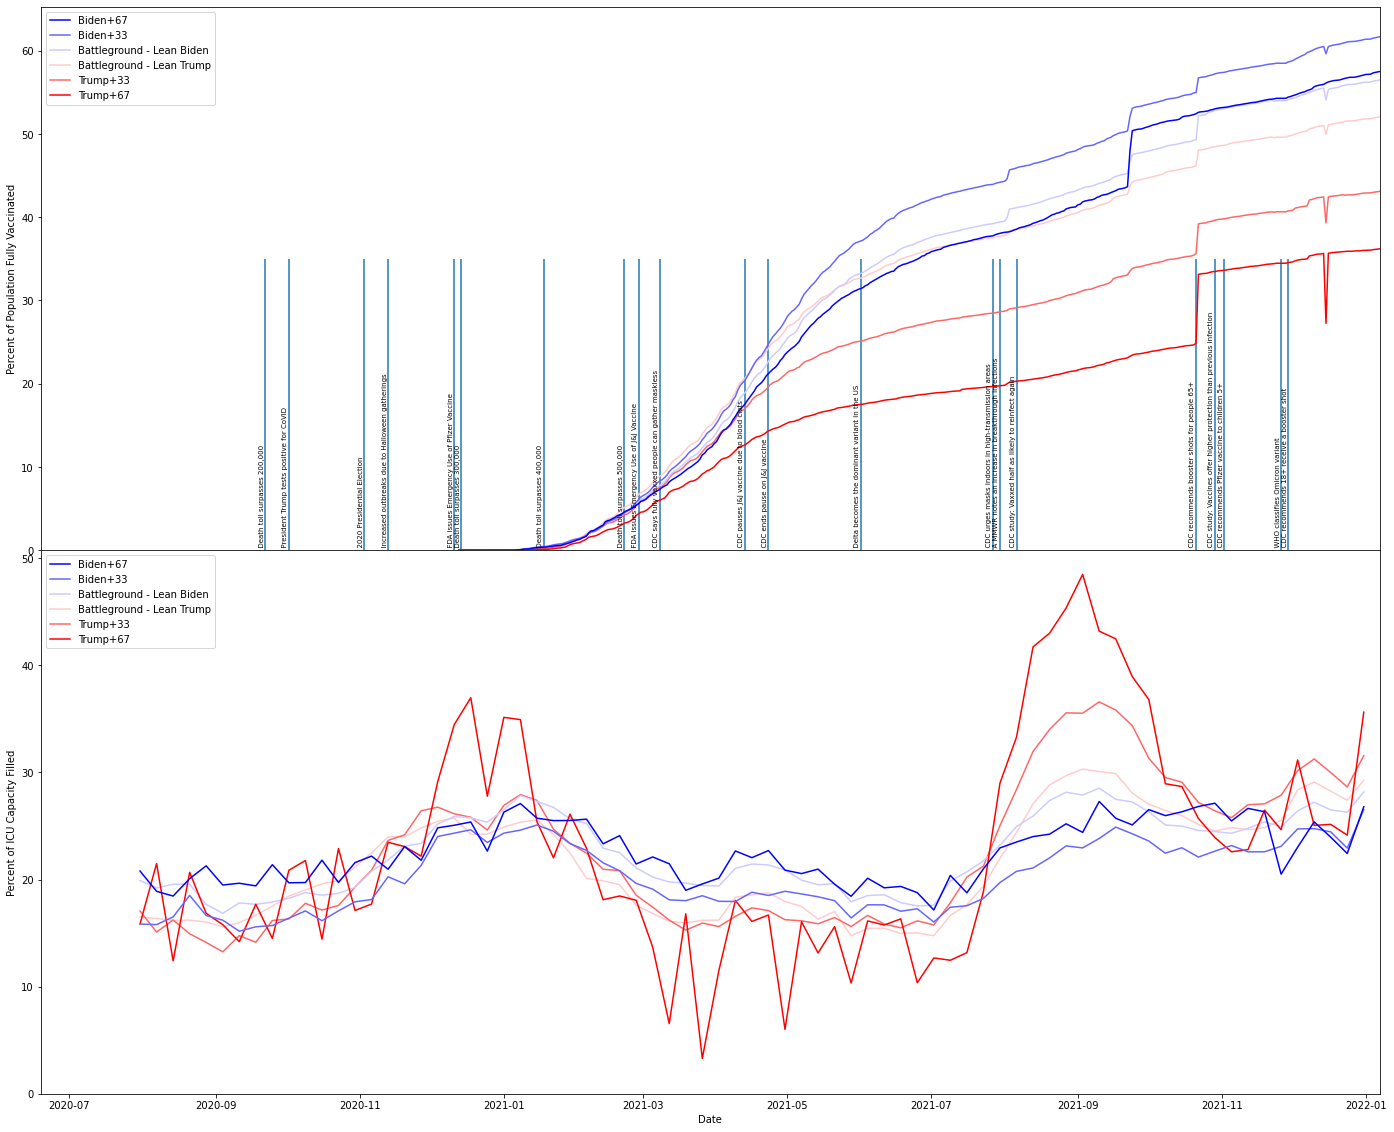

In [80]:
fig = plt.figure(figsize=(24,20))
ax1, ax2 = fig.subplots(nrows=2, sharex=True)
draw_vax(ax1, 'Series_Complete_Pop_Pct') #time_window=(timerange[0], timerange[-1]))
draw_legend(ax1)
draw_events(ax1, height=35)
draw_hosp(ax2, time_window=(timerange[0], timerange[-1]))
draw_legend(ax2)
#draw_events(ax2, height=15)
plt.subplots_adjust(hspace=0)
plt.savefig('./final_graph.png', dpi=300)

In [27]:
import cv2
import glob
import os

In [28]:
def create_video(img_dir, filename):
    imgs = glob.glob(os.path.join(img_dir, '*.png'))
    height, width, _ = cv2.imread(imgs[0]).shape
    fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
    video = cv2.VideoWriter(filename, fourcc, 60, (width,height))
    for img in tqdm(imgs):
        video.write(cv2.imread(img))
    cv2.destroyAllWindows()
    video.release()

In [631]:
create_video('./imgs/vax', 'vax.mp4')

  0%|          | 0/4536 [00:00<?, ?it/s]

In [42]:
vax_example = cv2.imread('./imgs/vax/4000.png')
icu_example = cv2.imread('./imgs/icu/4000.png')
result = icu_example + vax_example
fig = plt.figure(figsize=(12,8))
cv2.imshow('test',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

<Figure size 864x576 with 0 Axes>